In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("train 1.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
import seaborn as sns

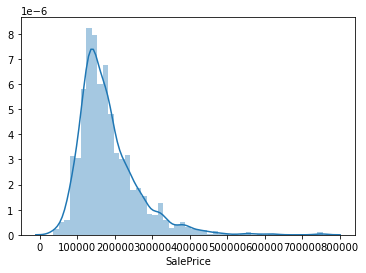

In [6]:
sns.distplot(df["SalePrice"])

In [7]:
total=df.isnull().sum().sort_values(ascending=False)

In [8]:
total

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [9]:
percent=df.isnull().sum()/df.shape[0]*100

In [10]:
percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [11]:
missing_values=pd.concat([total,percent],axis=1,keys=["Total","Percent"])

In [12]:
missing_values.head(20).sort_index()

,Total,Percent
Alley,1369,93.767123
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
BsmtQual,37,2.534247
Electrical,1,0.068493
Fence,1179,80.753425
FireplaceQu,690,47.260274
GarageCond,81,5.547945


In [13]:
null_has_meaning=["Alley","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","BsmtQual","Fence","FireplaceQu",
                   "GarageCond","GarageFinish","GarageQual","GarageType","PoolQC","MiscFeature"]

In [14]:
for i in null_has_meaning:
    df[i].fillna("None",inplace=True)

In [15]:
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum()/df.shape[0]*100
missing_values=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_values.head(20)


,Total,Percent
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


In [16]:
df.drop("LotFrontage",axis=1,inplace=True)

In [17]:
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum()/df.shape[0]*100
missing_values=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_values.head(20)


,Total,Percent
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
ExterQual,0,0.000000


In [18]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(),inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(),inplace=True)
df["MasVnrType"].fillna("None",inplace=True)

In [19]:
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum()/df.shape[0]*100
missing_values=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_values.head(20)

,Total,Percent
Electrical,1,0.068493
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
MasVnrArea,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000


In [20]:
df.dropna(inplace=True)

In [21]:
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum()/df.shape[0]*100
missing_values=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_values.head(20)

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


In [22]:
type_train=df.dtypes
num_train=type_train[(type_train=="int64")|(type_train=="float")]

In [23]:
cat_train=type_train[(type_train=="object")]

In [24]:
pd.DataFrame(type_train)[0].value_counts()

object     43
int64      35
float64     2
Name: 0, dtype: int64

In [25]:
numerical_values_train=list(num_train.index)

In [26]:
numerical_values_train

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [27]:
catagorical_values_train=list(cat_train.index)
catagorical_values_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
import numpy as np

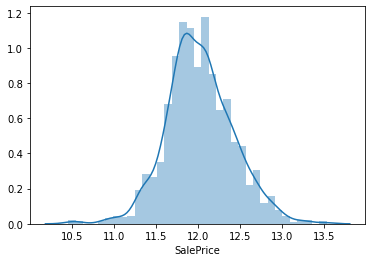

In [29]:
sns.distplot(np.log(df["SalePrice"]))

In [30]:
df["Transformed_price"]=np.log(df["SalePrice"])

In [31]:
df["MSZoning"].value_counts()

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [32]:
df[catagorical_values_train]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal


In [33]:
set(df["MSZoning"])

{'C (all)', 'FV', 'RH', 'RL', 'RM'}

In [34]:
for i in catagorical_values_train:
    feature_set=set(df[i])
    for j in feature_set:
        feature_list=list(feature_set)
        df.loc[df[i]==j,i]=feature_list.index(j)

In [35]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Transformed_price
0,1,60,1,8450,1,2,1,0,0,2,...,3,4,4,0,2,2008,8,0,208500,12.247694
1,2,20,1,9600,1,2,1,0,0,4,...,3,4,4,0,5,2007,8,0,181500,12.109011
2,3,60,1,11250,1,2,2,0,0,2,...,3,4,4,0,9,2008,8,0,223500,12.317167
3,4,70,1,9550,1,2,2,0,0,1,...,3,4,4,0,2,2006,8,5,140000,11.849398
4,5,60,1,14260,1,2,2,0,0,4,...,3,4,4,0,12,2008,8,0,250000,12.429216


In [36]:
x=df.drop(["Id","SalePrice","Transformed_price"],axis=1)

In [37]:
y=df["SalePrice"]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [40]:
params={"alpha":[0.0001,0.001,0.01,0.5,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}

In [41]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [42]:
lasso=Lasso()
folds=5
model_cv=GridSearchCV(estimator=lasso,param_grid=params,scoring="neg_mean_absolute_error",return_train_score=True,cv=folds,
                      verbose=1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sajan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318219091916.9294, tolerance: 577058394.3614022
  model = cd_fast.enet_coordinate_descent(
C:\Users\sajan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318220164059.32025, tolerance: 577058394.3614022
  model = cd_fast.enet_coordinate_descent(
C:\Users\sajan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318230881419.90405, tolerance: 577058394.3614022
  model = cd_fast.enet_coordinate_descent(
C:\Users\sajan\anaconda3\l

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.5, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7,
                                   8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
cv_results=pd.DataFrame(model_cv.cv_results_)

In [44]:
cv_results.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha            object
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

In [45]:
cv_results["param_alpha"]=cv_results["param_alpha"].astype("float32")

In [46]:
cv_results.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha           float32
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

In [47]:
import matplotlib.pyplot as plt

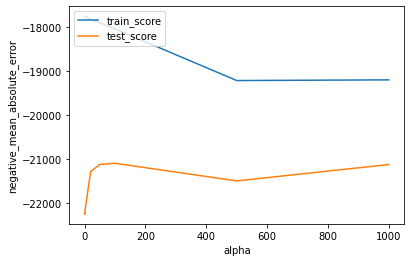

In [48]:
plt.plot(cv_results["param_alpha"],cv_results["mean_train_score"])
plt.plot(cv_results["param_alpha"],cv_results["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("negative_mean_absolute_error")
plt.legend(["train_score","test_score"],loc="upper left")
plt.show()

In [49]:
alpha=50
lasso=Lasso(alpha=alpha)
lasso.fit(x_train,y_train)

Lasso(alpha=50)

In [50]:
lasso.coef_

array([-1.37327886e+02, -2.78292690e+03,  3.53471241e-01,  8.54751509e+03,
        1.97284255e+03,  0.00000000e+00, -1.94491387e+03, -0.00000000e+00,
        1.10577312e+03, -6.98840774e+02, -9.81936816e+01, -1.95502044e+03,
        2.91630245e+04, -3.43863190e+00,  2.02331525e+03,  1.23854999e+04,
        6.97028372e+03,  3.24645612e+02,  1.32197424e+02, -1.25685882e+03,
       -1.63932515e+03, -3.30415503e+02,  6.06855390e+02,  3.82172008e+03,
        4.44111406e+01, -2.75178743e+03,  4.15193069e+02,  4.47115346e+03,
        4.79478759e+03,  1.75130789e+01, -5.92176317e+03, -3.79707980e+02,
        2.94699578e+01,  1.67855183e+03,  1.52048604e+01,  1.65014549e+01,
        9.49355755e+00,  1.26262866e+02,  1.85340614e+03, -4.46266024e+03,
       -4.16190189e+03,  3.92038711e+01,  5.81315435e+01, -1.86056923e+01,
        7.39676954e+00,  5.38314621e+03, -0.00000000e+00,  1.95756197e+03,
        2.61205530e+03, -5.93546308e+03, -2.10993817e+04, -7.84653036e+03,
        2.61591659e+03, -

In [51]:
ridge=Ridge()
folds=5
model_cv=GridSearchCV(estimator=ridge,param_grid=params,scoring="neg_mean_absolute_error",return_train_score=True,cv=folds,
                      verbose=1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.5, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7,
                                   8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
cv_results=pd.DataFrame(model_cv.cv_results_)

In [53]:
cv_results.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha            object
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

In [54]:
cv_results["param_alpha"]=cv_results["param_alpha"].astype("float32")

In [55]:
cv_results.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha           float32
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

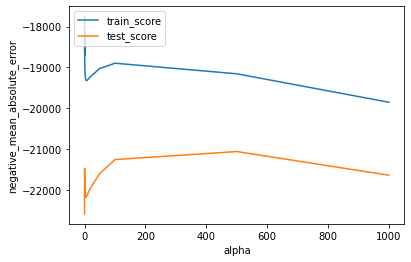

In [56]:
plt.plot(cv_results["param_alpha"],cv_results["mean_train_score"])
plt.plot(cv_results["param_alpha"],cv_results["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("negative_mean_absolute_error")
plt.legend(["train_score","test_score"],loc="upper left")
plt.show()

In [57]:
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(x_train,y_train)

Ridge(alpha=10)

In [58]:
ridge.coef_

array([-1.88312913e+02, -3.40976806e+03,  3.23163609e-01,  5.60151207e+03,
        3.19248867e+03, -8.65430936e+02, -4.66677920e+03, -3.30187149e+03,
        1.38683174e+03, -2.62523942e+03, -7.37607428e+01, -1.92788721e+03,
        2.19133833e+04,  8.54358964e+02,  3.38823591e+03,  1.51168284e+04,
        6.20523174e+03,  2.83233941e+02,  1.25218702e+02, -1.76426287e+03,
        1.23708442e+03, -4.93456018e+02,  7.89788018e+02,  4.00053962e+03,
        4.53478801e+01, -1.06099249e+03,  1.16191930e+03,  3.57160384e+03,
        3.79346437e+03, -1.20172824e+03, -6.84707363e+03, -7.96889459e+02,
        7.22426354e+00,  8.59896496e+02, -3.45993411e-01,  2.48656873e+00,
        9.36483636e+00, -1.14350733e+02,  1.75733528e+03, -3.81676009e+03,
       -3.09457371e+03,  9.28725773e+00,  3.17679441e+01, -7.18484825e+00,
        3.38703497e+01,  1.07820186e+04,  4.12946114e+03,  5.43559886e+03,
        3.25707647e+03, -5.17554388e+03, -1.37049729e+04, -7.99461021e+03,
        2.12897834e+03, -